# Tarea 1. Python
Guillermo Segura Gómez

## Construcción de un corpus

Utilice Python para construir el corpus de Práctica 1: Python y Talacha; construyelo con la mayor cantidad de conferencias a la fecha. El objetivo es llegar a un corpus similar al que se muestra en clase de conferencias seudo limpias en texto. Siéntase libre de usar el mismo código de las prácticas y NLTK, o bien su propio código y cualquier otra librería de Python.

Nota: Exclusivamente en este punto, SOLO proporcionar la liga a su carpeta GDrive con estos datos. No escribir en el Notebook las instrucciones para conseguir el corpus, solo poner en una celda la liga a su GDrive, además de ponerla en el Classroom al subir la tarea.

Liga de classroom donde se encuentra el corpus:

https://drive.google.com/drive/folders/1vJqRNCX8uErTd5_n8wozf4x9i7vjmEhO?usp=sharing

## Vistazo a los datos

Utilice funciones básicas de Python para hacer lo siguiente:
#### 1. Cargue todas las conferencias en un string y aplique la función split para generar tokens fácilmente.

---

Para cargar todas las conferencias utilizamos un ciclo for que itera sobre el total de páginas descargadas. Dentro del ciclo se abre el contenido y se guarda en un string. Para tokenizar utilizamos la función ``split`` en una **list comprenhension**. Luego utilizamos el hecho de que si se suman las listas en python en realidad se estan concatenando. Guardamos las listas en un arreglo llamado **contenido_completo**.

In [1]:
import glob

# Lista con el contenido completo tokenizado
tokens_completo = []
contenido_completo = []

# Iteramos sobre los archivos en la carpeta especificada
for paginas in glob.glob("/Users/guillermo_sego/Desktop/Segundo Semestre/PLN/MorningData/*"):
    # Abrimos los archivos
    with open(paginas, "r", encoding="utf-8") as file:
        # Se lee el contenido del archivo y se guarda en un string
        contenido = file.read()
        contenido_completo.append(contenido)
        # List comprenhension para guardar la lista tokenizada
        tokens = [token for token in contenido.split(" ")]
        # Se agrega a la lista final
        tokens_completo += tokens

# Unimos todo el contenido en un solo string al final
contenido_completo_str = ' '.join(contenido_completo)


#### 2. Contar la cantidad de palabras en todas las conferencias.

---

Utilizamos la función ``len``

In [2]:
print("La cantidad total de palabras es igual a: " + str(len(tokens_completo)))

La cantidad total de palabras es igual a: 13334143


#### 3. Extraer el vocabulario y mostrar su longitud de todo el corpus.

---

Para extraer el vocabulario lo que se tiene que hacer es convertir la lista en un conjunto en python utilizando la función ``set``. La función ``set`` permite identificar los elementos únicos descartando los elementos repetidos.

In [3]:
vocabulary = set(tokens_completo)
print("La longitud del vocabulario es: " + str(len(vocabulary)))

La longitud del vocabulario es: 435337


#### 4. Mida la riqueza del vocabulario de alguna forma en todos los documentos.

---

Para medir la riqueza del vocabulario podemos calcular la relación entre el número de palabras únicas y el número de palabras totales. Esto es la ``lexical_diversity`` asociado con un texto, que es básicamente el tamaño del vocabulario dividido por el número total de palabras (tokens) en el texto. Es una buena medida de la diversidad ya que te indica la cantidad de palabras que aparecen en un texto. [1]

Como ya tenemos en un string el contenido de todos los textos. Esto se hace simplemente diviendo la longitud del vocabulario entre la longitud del contenido completo.

In [4]:
lexical_diversity = len(vocabulary) / len(tokens_completo)
print("Lexical Diversity:", lexical_diversity)
print("Percentage: " + str(lexical_diversity*100) )

Lexical Diversity: 0.03264829243244204
Percentage: 3.264829243244204


#### 5. Haga lo mismo que los 4 puntos anteriores pero con todo el texto en minúsculas. 
Vea las diferencias y comente brevemente (sino comentas habrá penalización).

---

Para poder hacer esto necesitamos primero convertir todos los elementos de la lista **contenido_completo** a minúsculas. Es necesario construir una nueva lista. Podemos hacerlo fácilmente utilizando una **list comprenhension**.

In [5]:
# Utilizamos una list comprenhension para convertir cada string a minúsculas
tokens_completo_lower = [texto.lower() for texto in tokens_completo]
print("La cantidad total de palabras en minúsculas es igual a: " + str(len(tokens_completo_lower)))

La cantidad total de palabras en minúsculas es igual a: 13334143


Después de convertir las palabras a minúsuclas, siguen siendo la misma cantidad de palabras. Ahora el vocabulario en minúsculas.

In [6]:
vocabulary_lower = set(tokens_completo_lower)
print("La longitud del vocabulario en minúsuclas es: " + str(len(vocabulary_lower)))

La longitud del vocabulario en minúsuclas es: 416241


La longitud de vocabulario en minúsuclas es menor al que tenía el vocabulario sin normalizar (convertir a minúsculas). Esto nos indica que la medición que realizamos en los puntos anteriores no tenia en cuenta la diferencia que existe entre carácteres en mayúsculas y minúsculas, pudiendo tener que en nuestro vocabulario se tenía como palabras distintas *De*, *de*, *DE*. En el momento en el que se convirtió todo a minúsculas esa ambigüedad se perdió, reduciendo la longitud del vocabulario. 

In [7]:
lexical_diversity = len(vocabulary_lower) / len(tokens_completo_lower)
print("Lexical Diversity:", lexical_diversity)
print("Percentage: " + str(lexical_diversity*100) )

Lexical Diversity: 0.031216179397506087
Percentage: 3.1216179397506085


Debido a que disminuyó la cantidad de palabras en el vocabulario y el total sigue siendo el mismo, la diversidad léxica disminuyó, dándonos una medida mas acertada.

#### 6. Haga lo mismo que los puntos 1, 2 y 3 usando el tokenizador RegExp de NLTK.
Utilice una expresión regular que trate de sacar solo tokens que pueden contener solo letras mayúsculas y minúsculas. Después cargue los tokens en un objeto Text de NLTK en lugar de una lista de Python.

---

Para lograr esto es necesario primero importar la libreria **nltk**, asi como las funciones *RegexpTokenizer* y *Text*. Utilizamos una expresión regular únicamente para mayúsculas y minúsculas, esto va generar errores si tenemos signos de puntuación, como acentos o guiones. Finalmente tokenizamos y cargamos el texto en un objeto Text de nltk.

In [8]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.text import Text

In [9]:
# Expresión regular para palabras con letras mayúsculas y minúsculas
regexp = r'[A-Za-z]+'

# Tokenizador
tokenizer = RegexpTokenizer(regexp)

# Tokenizamos el texto
tokens_nltk = tokenizer.tokenize(contenido_completo_str)

# Carga los tokens en un objeto Text de nltk
texto_nltk = Text(tokens_nltk)


Una vez con el texto en un objeto nlkt con el cual podemos trabajar, hacemos los puntos 1, 2 y 3.

In [10]:
print("La cantidad total de palabras es igual a: " + str(len(texto_nltk)))

La cantidad total de palabras es igual a: 14860417


In [11]:
vocabulary_nlkt = set(texto_nltk)
print("La longitud del vocabulario es: " + str(len(vocabulary_nlkt)))

La longitud del vocabulario es: 88224


In [12]:
lexical_diversity = len(vocabulary_nlkt) / len(texto_nltk)
print("Lexical Diversity:", lexical_diversity)
print("Percentage: " + str(lexical_diversity*100) )

Lexical Diversity: 0.0059368455138237375
Percentage: 0.5936845513823737


La diversidad es mucho menor utilizando el tokenizador **RegExp**. La cantidad de tokens en el texto completo es relativamente del mismo orden que la que encontramos en el punto 2. Sin embargo al momento de contar el vocabulario, éste es mucho menor que el encontrado en el apartado 3. Esto podría estar relacionado en como estamos filtrando la información. El uso de ``RegexpTokenizer`` puede resultar en un vocabulario más "limpio" pero menos diverso, ya que muchas variaciones y formas de palabras quedan excluidas.

#### 7. Haga todo el texto minúsculas. Haga los mismo que los puntos 1, 2, y 3 

Utilizando el tokenizador *TweetTokenizer* ; COMENTE BREVEMENTE DIFERENCIAS. Haga el resto de esta tarea asumiendo haber hecho este punto.

---

Primero necesitamos importar el tokenizador *TweetTokenizer*, para posteriormente trabajar con todo el texto en minúsculas. 

In [13]:
from nltk.tokenize import TweetTokenizer

In [14]:
contenido_completo_lower_str = contenido_completo_str.lower()

# Inicializar el TweetTokenizer
tweet_tokenizer = TweetTokenizer()

# Tokenizar
tokens_tweet = tweet_tokenizer.tokenize(contenido_completo_lower_str)

# Transformamos en text
texto_tweet = Text(tokens_tweet)

Ahora hacemos el mismo procedimiento que hemos estado haciendo.

In [15]:
print("La cantidad total de palabras es igual a: " + str(len(tokens_tweet)))

La cantidad total de palabras es igual a: 15981392


In [16]:
vocabulary_tweet = set(tokens_tweet)
print("La longitud del vocabulario es: " + str(len(vocabulary_tweet)))

La longitud del vocabulario es: 91316


In [17]:
lexical_diversity = len(vocabulary_tweet) / len(tokens_tweet)
print("Lexical Diversity:", lexical_diversity)
print("Percentage: " + str(lexical_diversity*100) )

Lexical Diversity: 0.005713895260187598
Percentage: 0.5713895260187598


La diversidad léxica es ligeramente inferior pero del mismo orden que la obtenida en el punto anterior. Esto nos indica que puede haber un error en el método por espacios que se utilizó para tokenizar, ya que dos métodos probaron obtener una diversidad léxica bastante inferior. El tokenizador tweet no dependió de una expresión regular y encontró un vocabulario mayor. Sin embargo fue menor en diversidad léxica debido a que la cantidad total de tokens que encontró también fue mucho mayor. 

## Funciones NLTK

#### 1. Use la función *concordance* para ver el contexto de 5 palabras que usted elija.

---

Vamos a utilizar el objeto nltk construido en el punto 7 de la sección anterior. En este objeto utilizamos el tokenizador tweet. 

In [18]:
texto_tweet.concordance("Guanajuato")

Displaying 25 of 1931 matches:
na . fue una gasolinera en león , guanajuato , servicios hermanos aldama ; tam
 en veracruz , y en oaxaca , y en guanajuato . un ejemplo , gas lux , en zacat
 pues en cinco , porque estuve en guanajuato , en hidalgo y en tamaulipas , ci
 . ricardo sheffield padilla : de guanajuato . zamarripa . presidente andrés m
 de conservadores en el estado de guanajuato lo asesinaron , como también otra
 , michoacán , sinaloa , oaxaca , guanajuato y yucatán en el mismo sentido con
tenemos más brotes de violencia : guanajuato , tamaulipas , jalisco , michoacá
arco antonio hernández carrillo a guanajuato . la doctora maría guadalupe del 
se pretendía llevar agua a león , guanajuato , y por eso lo del acueducto , qu
rovidencia en san josé iturbide , guanajuato , también está dando por abajo de
 homicidios dolosos , ellos son : guanajuato , michoacán , baja california , e
a de las víctimas de homicidio en guanajuato en donde aquí en el último mes se
 . el día 11 de julio

In [19]:
texto_tweet.concordance("drogas")

Displaying 25 of 1292 matches:
enores implicadas en el trasiego de drogas , dos mil 600 litros de combustible
anera , los sobrantes de diferentes drogas que producen , los mezclan y se gen
tenemos que bajar el consumo de las drogas , porque ha crecido y está creciend
cido y está creciendo el consumo de drogas que son fatales , terribles , que d
tención a los jóvenes , el no a las drogas ; pero dar opciones , dar alternati
emás decir por qué no , por qué las drogas destruyen , explicar el daño que oc
el consumo del cristal y de ciertas drogas . no se habla de eso , con todo res
óvenes , que se hable más sobre las drogas , que se sigan abriendo opciones pa
anza , logrando el aseguramiento de drogas , armas y diferentes sustancias ilí
 aquí una muestra de lo asegurado : drogas , armas , teléfonos , entre otros i
s , cartuchos , chalecos tácticos y drogas . este fue el evento de san josé de
trabaja , ni ha trabajado , consume drogas , ha declarado que obtiene recursos
diseñar y replantear 

In [20]:
texto_tweet.concordance("seguridad")

Displaying 25 of 12784 matches:
 , además de la lucha por la paz y seguridad internacionales , lineamientos hoy
arcía luna estaba de secretario de seguridad pública . entonces , de acuerdo a 
d nacional . es un asunto hasta de seguridad nacional , tiene que ver con la pr
hablaron esta mañana en la mesa de seguridad ? presidente andrés manuel lópez o
ctividad de las comunidades y dará seguridad en el cruce de vehículos y tren . 
s , acuerda estos espacios para la seguridad espacial , pero dice que méxico no
re el apoyo de estos organismos de seguridad como la dea y el fbi , que iban a 
ngton los miembros del gabinete de seguridad de méxico con sus homólogos del go
untos de cooperación en materia de seguridad . intervención : el gobernador ( i
n en buen estado las escuelas , la seguridad , que no se nos salga de control l
creo que en segundo o en tercero , seguridad . ¿ no tienes por ahí la última en
 , por favor ― tenemos sistemas de seguridad y sistemas de monitoreo y control 
lgunos f

In [21]:
texto_tweet.concordance("covid")

Displaying 25 of 3673 matches:
para intubar a pacientes críticos de covid - 19 . el señor darío celis asegura 
o inapam infonavit información sobre covid - 19 instituto de salud para el bien
cto tren maya registro vacuna contra covid - 19 sembrando vida trabajadoras del
s uno de los estados que más pruebas covid aplica per cápita y somos también el
acto en lo general . la pandemia del covid - 19 nos ha impuesto nuevos retos . 
e de manera temporal - como hospital covid y dirigido por nuestro ejército mexi
té operando para atender enfermos de covid el hospital de gómez palacio porque 
 o los hospitales , que ahora por el covid a marchas forzadas estamos equipando
o inapam infonavit información sobre covid - 19 instituto de salud para el bien
cto tren maya registro vacuna contra covid - 19 sembrando vida trabajadoras del
o inapam infonavit información sobre covid - 19 instituto de salud para el bien
cto tren maya registro vacuna contra covid - 19 sembrando vida trabajadoras del
reve come

In [22]:
texto_tweet.concordance("calderón")

Displaying 25 of 2774 matches:
 gonzález , el expresidente felipe calderón y la coparmex han reproducido este
ejero de iberdrola al expresidente calderón . eso no sucede en ningún país del
sto lo hacen en la época de felipe calderón , cuando garcía luna estaba de sec
mento fue en el gobierno de felipe calderón , y como todas esas se las colgaba
 de lópez-dóriga , y de fox , y de calderón , y de salinas , y los de arriba ,
ue vinculen al expresidente felipe calderón con estos vínculos con joaquín guz
ano derecha . interlocutora : ¿ de calderón ? presidente andrés manuel lópez o
te andrés manuel lópez obrador : a calderón , sí , a calderón , porque sí estu
ópez obrador : a calderón , sí , a calderón , porque sí estuvo con fox , pero 
marnos . también alejandro antonio calderón alipi , doctor alejandro calderón 
 calderón alipi , doctor alejandro calderón alipi es el responsable de que no 
está el doctor ? alejandro antonio calderón alipi , titular designado de la co
 cargos , son encargo

In [23]:
texto_tweet.concordance("cimat")

Displaying 6 of 6 matches:
y talentoso grupo de matemáticos del cimat y del instituto de matemáticas de la
icas recrea , en el que participa el cimat , el centro de investigación en mate
n educativa en una escuela de nombre cimat si no pagan la cuota , sin importarl
 . los menciono por institución : el cimat , el centro de investigación en mate
cos , el segundo grupo académico del cimat además tiene una colaboración con el
és christen y marcos capistrán , del cimat , del propio centro de investigación


#### 2. Elija una palabra que le parezca interesante y muestre palabras con uso similar. 

Muestre también los contextos comunes. COMENTE al respecto.

---


In [24]:
texto_tweet.similar("prian")

pueblo gobierno país presidente mundo dinero estado presupuesto agua
bienestar año tema y día reforma covid tiempo norte ejército cambio


In [25]:
texto_tweet.similar("beca")

pensión investigación empresa información campaña parte familia
pregunta propuesta gente casa semana vida situación obra reforma
operación reunión persona denuncia


In [26]:
texto_tweet.similar("ciencia")

corrupción información investigación salud educación economía
seguridad justicia violencia que democracia gente atención
comunicación vida verdad reforma población infraestructura historia


Es interesante como en la palabra **ciencia**, existe una variedad de palabras muy interesante. Esto nos indica que en las conferencias de prensa del presidente se habla de bastantes temas con la misma estructura contextual. Por ejemplo, cuando se habla de ciencia, se encontraron conceptos en áreas claves como: *educación*, *economía*, *salud*. Es decir, que al buscar la palabra ciencia, la función ``similar``la encuentra en los mismos contextos que estos temas clasves, indicando un discurso similar cuando se habla de ciencia y estos temas. Esto podría indicar que el discurso político no aísla a la ciencia como un dominio independiente, sino que la integra en una amplia gama de cuestiones sociales, económicas y políticas.

La misma relación se observa con términos como *investigación*, +información* y *comunicación*, lo que sugiere que el discurso en torno a la ciencia comparte similitudes con la manera en que se abordan estos conceptos. Esto puede indicar discusiones sobre la importancia de la comunicación científica, la divulgación y la lucha contra la desinformación.

Como último punto la búsqueda también arrojó las palabras *seguridad*, *violencia*, *corrupción* indicando que la estructura lingüistica con la que se trata la palabra ciencia es similar a estas otras palabras, indicando como la ciencia podría discutirse en este contexto en relación con sus aplicaciones prácticas y su impacto en áreas fundamentales para el bienestar y el desarrollo del país.

In [27]:
texto_tweet.common_contexts(["apoyo", "becas"])

de_a con_de de_de de_para de_al de_y de_que de_en y_a en_de sin_a
de_del de_con a_a dando_a entregar_a dieron_a da_a para_de es_para


En cuanto a los contextos comunes, hay bastantes que estan relacionados con preposiciones y palabras simples, lo cual sugiere que tanto **apoyo** como **becas** se discuten en términos de su relación con otros temas o cosas. Por ejemplo, frases como *apoyo de la comunidad* y *becas para estudiantes* podrían ser comunes, indicando cómo se proporciona el apoyo o a quién se dirigen las becas.

Existe también las palabras relacionadas con acciones. El hecho de que aparezcan, puede llevar a la formación de frases como *dando apoyo a* y *entregar becas a*, lo cual indica que en las conferencias de prensa abordan cómo se lleva a cabo el apoyo a través de becas, enfatizando el proceso y la acción de proporcionar estos beneficios.

#### 3. Organice todos los archivos de las conferencias y plot

Desde la más antigua hasta la más nueva (echando mano del nombre del archivo y fechas), y c ́arguelos en un objeto Text para generar un dispersion plot de las siguientes palabras: prian, corrupci ́on, mafia, narco, gasolina, pipas, conacyt, conahcyt, ciencia, turismo, pandemia, coronavirus, covid, delta, omicron, vacuna, vacunacion y otras cinco palabras de su elección.

---

El código para realizar esto es similar al que ya se tenía, únicamente se tienen que ordenar los archivos en el string antes de tokenizarlo para lograr el resultado deseado.

In [28]:
import os
# Ruta a la carpeta con los archivos
ruta_carpeta = "/Users/guillermo_sego/Desktop/Segundo Semestre/PLN/MorningData"

# Obtener una lista de todos los archivos en la carpeta
archivos = glob.glob(os.path.join(ruta_carpeta, "*.txt"))

# Ordenar los archivos por nombre ya que estan nombrados por fecha
archivos_ordenados = sorted(archivos)

Tokenizamos cuidando convertir todo a minúsculas.

In [29]:
# Lista con el contenido completo tokenizado
tokens_completo = []

# Inicializar el TweetTokenizer
tweet_tokenizer = TweetTokenizer()

# Iteramos sobre los archivos en la carpeta especificada
for paginas in archivos_ordenados:
    # Abrimos los archivos
    with open(paginas, "r", encoding="utf-8") as file:
        # Se lee el contenido del archivo y se guarda en un string
        contenido = file.read()
        
        # Tokenizar y convertir cada token a minúsculas
        tokens = [token.lower() for token in tweet_tokenizer.tokenize(contenido)]

        tokens_completo.extend(tokens)


# Crear el objeto Text con todos los tokens
texto_nltk_ordenado = Text(tokens_completo)


La función ``dispersion_plot``tiene un error. Revisar [2]

In [30]:
def dispersion_plot(text, words, ignore_case=False, title="Lexical Dispersion Plot"):
    """
    Generate a lexical dispersion plot.

    :param text: The source text
    :type text: list(str) or iter(str)
    :param words: The target words
    :type words: list of str
    :param ignore_case: flag to set if case should be ignored when searching text
    :type ignore_case: bool
    :return: a matplotlib Axes object that may still be modified before plotting
    :rtype: Axes
    """

    try:
        import matplotlib.pyplot as plt
    except ImportError as e:
        raise ImportError(
            "The plot function requires matplotlib to be installed. "
            "See https://matplotlib.org/"
        ) from e

    word2y = {
        word.casefold() if ignore_case else word: y
        for y, word in enumerate(words)
    }
    xs, ys = [], []
    for x, token in enumerate(text):
        token = token.casefold() if ignore_case else token
        y = word2y.get(token)
        if y is not None:
            xs.append(x)
            ys.append(y)

    _, ax = plt.subplots()
    ax.plot(xs, ys, "|")
    ax.set_yticks(list(range(len(words))), words, color="C0")
    ax.set_ylim(-1, len(words))
    ax.set_title(title)
    ax.set_xlabel("Word Offset")
    return ax


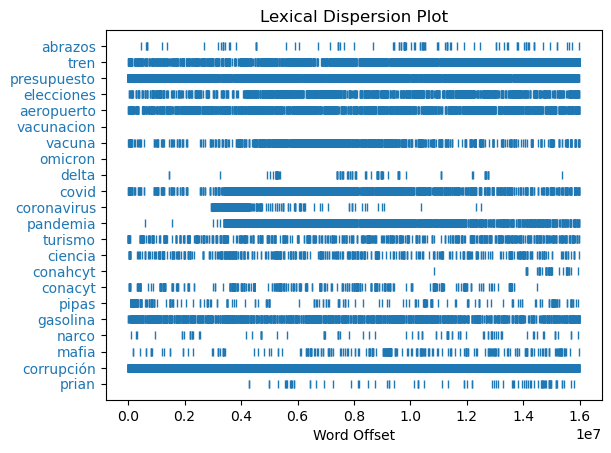

In [31]:
import matplotlib.pyplot as plt

# Lista de palabras para el gráfico de dispersión
palabras_clave = ["prian", "corrupción", "mafia", "narco", "gasolina", "pipas", "conacyt", "conahcyt",
                  "ciencia", "turismo", "pandemia", "coronavirus", "covid", "delta", "omicron",
                  "vacuna", "vacunacion", "aeropuerto", "elecciones", "presupuesto", "tren", "abrazos"]

# Genera el gráfico de dispersión
dispersion_plot(texto_nltk_ordenado, palabras_clave)

plt.show()


#### 4. Muestre 50 colocaciones de todo el corpus.

---

Para encontrar y mostrar 50 colocaciones en todo el corpus utilizamos el método ``collocations()``. Las colocaciones son combinaciones de palabras que ocurren juntas más frecuentemente de lo que cabría esperar por casualidad.

In [33]:
nltk.data.path.append('/Users/guillermo_sego/anaconda3/nltk_data/')
texto_nltk_ordenado.collocations(num=50)

lópez obrador; andrés manuel; manuel lópez; presidente andrés; estados
unidos; por ciento; buenos días; señor presidente; todos los; versión
estenográfica; nada más; guardia nacional; prensa matutina; muchas
gracias; por eso; tren maya; desde luego; por ejemplo; sin embargo;
derechos humanos; quintana roo; mil millones; creo que; baja
california; todas las; sobre todo; muy importante; adultos mayores;
por qué; ramírez cuevas; muy bien; que que; marcelo ebrard; jesús
ramírez; poder judicial; nuestro país; ver con; matutina del; tiene
que; para que; garcía luna; comisión federal; redes sociales; que nos;
los trabajadores; seguridad pública; del estado; nuevo león; gobierno
federal; del gobierno


#### 5. Muestre un histograma de longitud en caracteres de las palabras. 

Muestre en el histograma el top 5 de longitudes más largas.

---

Para mostrar un histograma de la longitud en caracteres de las palabras de tu corpus y destacar las top 5 longitudes más largas, hacemos lo siguiente. Primero necesitamos calcular la longitud de cada palabra única. Para esto utilizamos una list comprenhension. Luego ploteamos el histograma y resaltamos las 5 longitudes más largas.

In [34]:
# Obtener vocabulario
palabras_unicas = set(texto_nltk_ordenado)

# Calcular la longitud de vocabulario
longitudes = [len(palabra) for palabra in palabras_unicas]

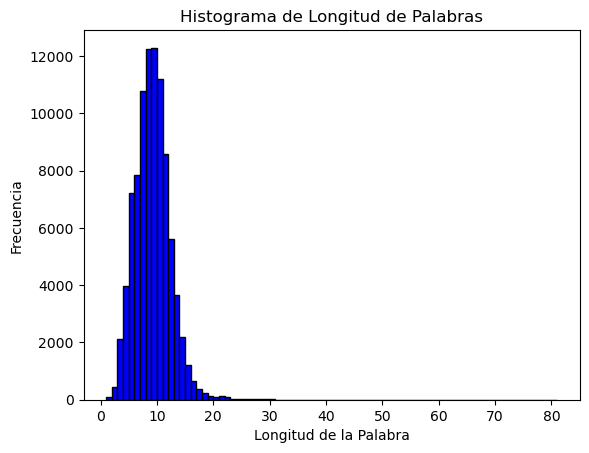

In [35]:
# Crear el histograma de longitudes de palabras
plt.hist(longitudes, bins=range(min(longitudes), max(longitudes) + 1), color='blue', edgecolor='black')

# Formato
plt.title('Histograma de Longitud de Palabras')
plt.xlabel('Longitud de la Palabra')
plt.ylabel('Frecuencia')

plt.show()

Para obtener un histograma destacado, necesitamos calcular las longitudes. Podemos utilizar el método **Counter** de la libreria ``collections``

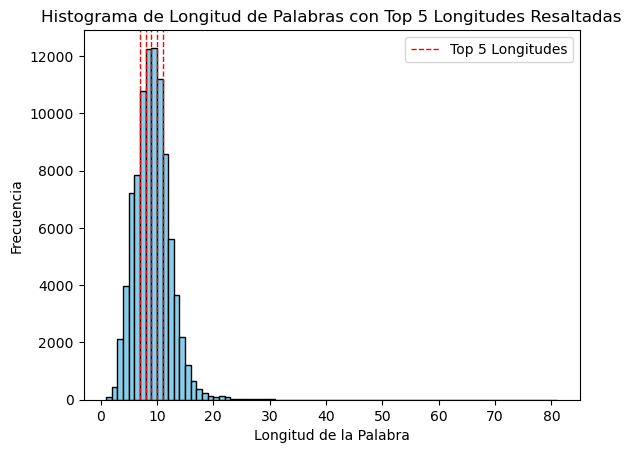

In [36]:
from collections import Counter

# Contar la frecuencia de cada longitud
frecuencia_longitudes = Counter(longitudes)

# Encontrar las top 5 longitudes más comunes
top_5_longitudes = frecuencia_longitudes.most_common(5)

# Crear el histograma
plt.hist(longitudes, bins=range(min(longitudes), max(longitudes) + 1), color='skyblue', edgecolor='black')

# Destacar las top 5 longitudes más largas
for longitud, _ in top_5_longitudes:
    plt.axvline(x=longitud, color='red', linestyle='dashed', linewidth=1)

# Formato
plt.legend(['Top 5 Longitudes'])
plt.title('Histograma de Longitud de Palabras con Top 5 Longitudes Resaltadas')
plt.xlabel('Longitud de la Palabra')
plt.ylabel('Frecuencia')
plt.show()


#### 6. Muestre 50 palabras con longitud mayor a 8 caracteres y frecuencia mayor a 5 
Usando comprenhension list de python.

---

Para contar la frecuencia de cada token podemos utilizar el método ``FreqDist``de la libreria **nltk**. Lo importamos y contamos las frecuencias de los tokens. Luego utilizamos una list comprenhension con un condicional para construir la lista.

In [37]:
from nltk.probability import FreqDist

# Calcular la frecuencia de cada token
fdist = FreqDist(texto_nltk_ordenado)

In [38]:
len_mayor_8 = [palabra for palabra in fdist if len(palabra) > 8 and fdist[palabra] > 5]
print("El tamaño del arreglo es: " + str(len(len_mayor_8)))

El tamaño del arreglo es: 15896


In [39]:
# Se muestran los primeros 50
len_mayor_8[:50]

['presidente',
 'importante',
 'seguridad',
 'interlocutor',
 'información',
 'interlocutora',
 'secretaría',
 'corrupción',
 'secretario',
 'trabajadores',
 'mexicanos',
 'conferencia',
 'situación',
 'presupuesto',
 'intervención',
 'elementos',
 'trabajando',
 'bienestar',
 'construcción',
 'investigación',
 'estenográfica',
 'preguntarle',
 'violencia',
 'república',
 'población',
 'desarrollo',
 'gobernador',
 'aeropuerto',
 'comunicación',
 'educación',
 'municipios',
 'siguiente',
 'protección',
 'inversión',
 'hospitales',
 'precisamente',
 'transformación',
 'autoridades',
 'democracia',
 'instituto',
 'secretaria',
 'gobiernos',
 'compromiso',
 'imagínense',
 'solamente',
 'propósito',
 'administración',
 'ciudadanos',
 'programas',
 'constitución']

#### 7. Proponga una gráfica usando ConditionalFreqDist para estos datos. 

Ver https://www.nltk.org/book/ch02.html en la secci ́on 1.5. Usted elige las palabras.

---

``ConditionalFreqDist`` de NLTK es una clase que permite construir una distribución de frecuencias condicionales. Es decir, en lugar de simplemente contar la frecuencia de cada elemento en un conjunto de datos, como hace ``FreqDist``, ``ConditionalFreqDist`` cuenta la frecuencia de los elementos bajo una condición determinada.

En la sección 1.5 del libro se habla acerca de como el corpus es una construcción de 55 textos completos a lo largo del tiempo. De hecho se menciona que una propiedad interesante es la dimensionalidad del tiempo, ya que se puede ver como palabras han influido a lo largo del tiempo. Para poder lograr esto con nuestros datos primero necesitamos extraer la dimensión del tiempo. Utilizamos la librería ``re`` para encontar el año en el nombre de los archivos que ya teníamos ordenados previamente. 

In [40]:
import re

# Lista para almacenar las fechas
fechas = []

# Expresión regular para el año
patron_fecha = r'\d{4}'

for archivo in archivos_ordenados:
    # Buscar la fecha en el nombre del archivo
    coincidencia = re.search(patron_fecha, archivo)
    if coincidencia:
        fechas.append(coincidencia.group())

Ahora si podemos construir el gráfico. Nótese que ya que solo guardamos el año, construiremos el plot por año. Se intentó construir por día pero el gráfico resultante era algo ilegible.

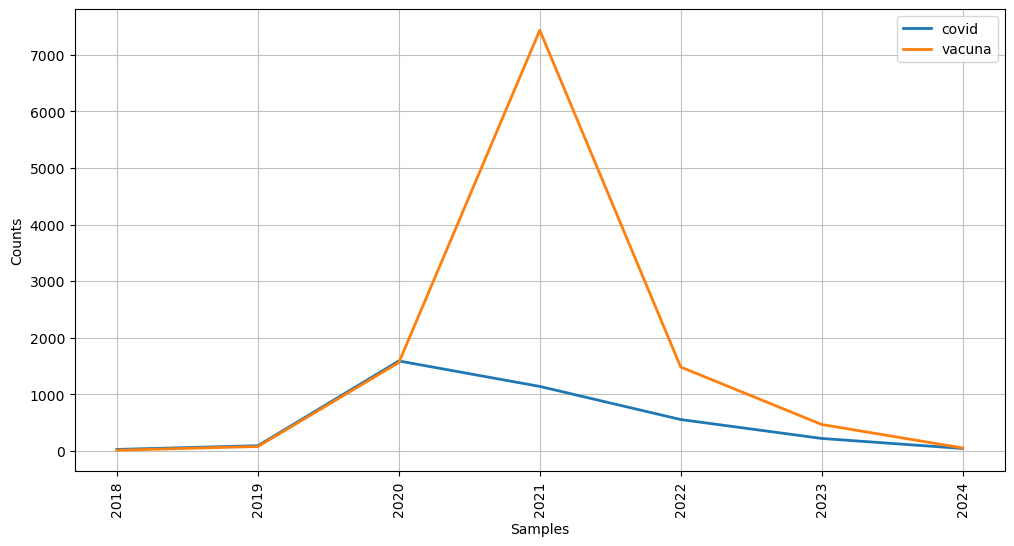

<Axes: xlabel='Samples', ylabel='Counts'>

In [41]:
from nltk.probability import ConditionalFreqDist

# Inicializar un ConditionalFreqDist vacío
cfd = ConditionalFreqDist()

# Definir las palabras objetivo
palabras_objetivo = ['covid', 'vacuna']

# Inicializar el TweetTokenizer
tweet_tokenizer = TweetTokenizer()

# Iterar sobre los archivos y sus fechas correspondientes
for archivo, fecha in zip(archivos_ordenados, fechas):
    with open(archivo, 'r', encoding='utf-8') as f:
        contenido = f.read().lower()  # Convertir a minúsculas
        
        # Tokenizar el contenido del archivo
        tokens = tweet_tokenizer.tokenize(contenido)
        
        # Añadir tokens al ConditionalFreqDist
        for token in tokens:
            for objetivo in palabras_objetivo:
                if token.startswith(objetivo):
                    cfd[objetivo][fecha] += 1

# Grafico
plt.figure(figsize=(12, 6)) 
cfd.plot()


#### 8. Use la lista de stopwords de nltk y obtenga la cantidad de palabras en los datos con y sin stopword. 
Comente brevemente las diferencias.

---

Para contar la cantidad de palabras en losdatos con y sin incluir las stopwords, primero necesitamos obtener la lista de stopwords de nltk y luego filtrar tus tokens basándote en esta lista.

In [42]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('spanish')) # Stopwords en español

In [43]:
# Contar todas las palabras (tokens)
total_palabras = len(texto_nltk_ordenado)

# Filtrar las palabras eliminando stopwords
palabras_sin_stopwords = [palabra for palabra in texto_nltk_ordenado if palabra not in stop_words]

# Contar las palabras sin stopwords
total_palabras_sin_stopwords = len(palabras_sin_stopwords)


In [44]:
print("Total de palabras (con stopwords): " + str(total_palabras))
print("Total de palabras (sin stopwords): " + str(total_palabras_sin_stopwords))

diferencia = total_palabras - total_palabras_sin_stopwords
print("Diferencia: " + str(diferencia))


Total de palabras (con stopwords): 15981392
Total de palabras (sin stopwords): 8933586
Diferencia: 7047806


Los resultados obtenidos del análisis muestran una cantidad significativa de palabras en el corpus, con un total de 15981392 palabras antes de eliminar las stopwords, y 8933586 palabras después de su eliminación. La diferencia es casi la mitad de las palabras con 7047806. Es bastante.

#### 9. Muestre las 300 palabras más frecuentes en las conferencias
Sin tomar en cuenta stopwords. Múestrelas de la m ́as frecuente a la menos frecuente.

---

Para lograr esto utilizamos la lista **palabras_sin_stopwords** que ya habíamos calculado en el punto pasado. Utilizamos la función ``FreqDsit`` para calcular la frecuencia de cada token. 

In [45]:
# Calcula la frecuencia de cada palabra
fdist = FreqDist(palabras_sin_stopwords)

In [46]:
# Obtener las 300 palabras más frecuentes
palabras_mas_frecuentes = fdist.most_common(300)

# Imprimir las palabras y sus frecuencias
for palabra, frecuencia in palabras_mas_frecuentes:
    print(f"{palabra}: {frecuencia}")


,: 1285246
.: 534210
:: 124394
presidente: 92818
¿: 66247
?: 66103
lópez: 49447
manuel: 48503
obrador: 48191
andrés: 47794
si: 47383
entonces: 43298
vamos: 40560
va: 40368
;: 39783
mil: 38578
méxico: 35719
aquí: 27960
gobierno: 26459
pues: 22760
ver: 22671
dos: 22520
ahora: 22295
‘: 21969
’: 20976
ahí: 19890
bueno: 19757
caso: 19496
millones: 19333
cómo: 18362
nacional: 18036
país: 17935
pregunta: 17713
…: 17426
días: 17347
pesos: 17269
van: 17239
así: 16911
ser: 16818
gente: 16572
hacer: 16550
señor: 16525
usted: 16373
pueblo: 15804
ciento: 15763
gracias: 14359
bien: 14116
año: 14064
tres: 14061
tema: 13916
años: 13664
parte: 13213
decir: 13200
importante: 13183
puede: 13153
hoy: 12817
seguridad: 12784
mismo: 12769
salud: 12709
tener: 12705
día: 12686
manera: 12488
personas: 12465
-: 12461
hace: 12442
interlocutor: 12242
tiempo: 12156
general: 11990
poder: 11848
unidos: 11825
información: 11660
buenos: 11545
todas: 11426
interlocutora: 11363
luego: 10872
secretaría: 10640
voy: 10397
a

## Otras librerias en Python

Investigue y comente brevemente en sus propias palabras:

#### 1. Mencione dos librerías en Python además de NLTK para NLP. Ponga una desventaja y ventaja de cada una.

--- 

##### 1. spaCy

**Ventaja**: spaCy está diseñado para ser rápido y eficiente. Además ofrece modelos previamente entrenados (preentrenados) para varias lenguas y es capaz de manejar tareas como tokenización, lematización, reconocimiento de entidades nombradas, y análisis de dependencias. Su API es muy intuitiva y fácil de usar para los desarrolladores. Tiene una API es bastante útil si quieres trabajar con desarrollo en la web. [3]

**Desventaja**: Aunque spaCy es muy poderoso y útil para muchas tareas de NLP, no es tan adecuado para tareas de NLP que requieren un trabajo detallado a nivel de token o para las que se requiere un control más fino sobre los componentes del procesamiento del lenguaje. Por ejemplo para contextos académicos o de investigación mas profunda. [3]

##### 2. Transformers

**Ventaja**: La biblioteca transformers fue desarrollada por Hugging Face. Esta librería proporciona una gran cantidad de modelos de NLP preentrenados basados en arquitecturas de transformadores, como BERT, GPT-2, T5, etc. Estos modelos pueden ser utilizados para una amplia gama de tareas de NLP, como la comprensión del lenguaje, generación de texto, traducción automática, y más. La biblioteca está en constante actualización con los últimos modelos y avances en el campo del NLP, lo cual es súper ya que trabajamos en un área en la que hay avances diariamente. [4]

**Desventaja**: La principal desventaja de usar modelos de transformers es su tamaño y costo computacional. Muchos de los modelos son muy grandes y requieren una cantidad significativa de recursos de memoria y procesamiento (a menudo, una GPU) para entrenar y ejecutar, lo que puede ser un obstáculo para aplicaciones con recursos limitados o para desarrolladores que no tienen acceso a este tipo de hardware. [4]


#### 2. Mencione tres alternativas para Text Processing en NLP qué existen en otros lenguajes.
De una ventaja y desventaja de cada una.

---

##### 1. **Apache OpenNLP (Java)**
- **Ventaja**: OpenNLP es un proyecto de la Fundación Apache que proporciona un conjunto de herramientas de NLP que incluye soporte para tareas como la tokenización, el etiquetado, y el reconocimiento de entidades nombradas. Su integración con otros proyectos de Apache lo hace ideal para entornos de producción que ya utilizan el ecosistema de Apache. Sobretodo para el desarrollo con Java, ya que para las personas que lo utilizan puede ser un poderoso recurso.
- **Desventaja**: Aunque es una herramienta sólida, no necesariamente está a actualizada o mas que nada a la vanguardia en términos de métodos o algoritmos. Esto puede ser una limitación para proyectos que buscan implementar las últimas innovaciones en NLP [5].

##### 2. **Stanford CoreNLP (Java)**
- **Ventaja**: Desarrollado por la Universidad de Stanford. Este conjunto de herramientas ofrece una amplia gama de funcionalidades de NLP, incluyendo NLP estadístico, NLP de aprendizaje profundo. Debido a que fue desarrollado en un ambiente académico, este paquete busca estar a la vanguardia en temas de procesamiento de lenguaje natural, incluyendo los últimos avances en el tema [5].
- **Desventaja**: Aunque es extremadamente potente para la investigación y la experimentación, puede no ser la mejor opción para trabajos en la industria debido a posibles costos adicionales para usos comerciales además de que puede ser más complejo de integrar en aplicaciones de la insdustria [5].

##### 3. **Retext (Node.js)**
- **Ventaja**: Retext es parte del colectivo unificado y permite la integración eficaz de múltiples herramientas y plugins. Su enfoque en plugins para realizar tareas de procesamiento de lenguaje natural lo hace muy flexible y fácil de ampliar para adaptarse a necesidades específicas sin tener que entender del todo los procesos y técnicas del NLP [5].
- **Desventaja**: Dado que depende en gran medida de plugins para su funcionalidad, podría no ser tan robusto o completo como soluciones más integradas para personas que buscan otro tipo de soluciones [5].

# Bibliografía

[1] Bird, Steven, Ewan Klein, and Edward Loper. Natural language processing with Python: analyzing text with the natural language toolkit. " O'Reilly Media, Inc.", 2009.

[2] “NLTK :: nltk.tokenize.regexp module.” Nltk.org, 2023. Online. Internet. 1 Feb. 2024. Available: https://www.nltk.org/api/nltk.tokenize.regexp.html#:~:text=A%20RegexpTokenizer%20splits%20a%20string,%3E%3E%3E%20from%20nltk.

[3] spaCy. https://spacy.io/

[4] Transformers. https://github.com/huggingface/transformers

[5] Ingersoll, Grant. “5 open source tools for taming text.” Opensource.com, 2015. Online. Internet. 1 Feb. 2024. Available: https://opensource.com/business/15/7/five-open-source-nlp-tools